# Importing Data

In [1]:
#importing necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
import folium
import geopandas as gpd

pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
#read in data
df = pd.read_csv('final_df.csv')

In [3]:
#drop first columns from df
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
df.head()

,YEAR,raceeth,How old are you,What is your sex,In what grade are you,Are you Hispanic/Latino,What is your race,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever prescription pain medicine use,Ever cocaine use,Ever inhalant use,Ever heroin use,Ever methamphetamine use,Ever ecstasy use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Fruit juice drinking,Fruit eating,Green salad eating,Potato eating,Carrot eating,Other vegetable eating,No soda drinking,No milk drinking,Breakfast eating,Television watching,Computer use,PE attendance,Sports team participation,HIV testing,Asthma,Sleep,Ever used LSD,Muscle strengthening,Indoor tanning,BMIPCT,weight,stratum,psu
0,2019.0,7.0,5.0,2.0,2.0,1.0,A,1.63,54.89,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,1.0,46.882141,1.6659,213.0,57923.0
1,2019.0,8.0,4.0,2.0,2.0,2.0,A D,1.60,53.98,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,7.0,6.0,5.0,5.0,6.0,1.0,5.0,8.0,3.0,3.0,1.0,1.0,2.0,2.0,4.0,1.0,6.0,1.0,62.232194,1.3851,213.0,57923.0
2,2019.0,8.0,4.0,1.0,2.0,2.0,B E,1.68,43.09,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,2.0,2.0,2.0,5.0,2.0,2.0,8.0,2.0,4.0,1.0,1.0,3.0,2.0,5.0,1.0,1.0,1.0,0.590171,1.4958,213.0,57923.0
3,2019.0,5.0,4.0,2.0,2.0,2.0,E,1.78,68.95,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,5.0,3.0,7.0,7.0,4.0,6.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,1.0,7.0,7.0,1.0,1.0,2.0,3.0,4.0,3.0,1.0,1.0,69.786634,1.7114,213.0,57923.0
4,2019.0,6.0,5.0,2.0,2.0,1.0,NaN,1.78,58.97,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,5.0,1.0,2.0,3.0,4.0,2.0,5.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,16.739994,1.6659,213.0,57923.0


### Initial EDA

In [5]:
print(df.shape)
df.info()

(73074, 78)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73074 entries, 0 to 73073
Data columns (total 78 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 73074 non-null  float64
 1   raceeth                              71308 non-null  float64
 2   How old are you                      72716 non-null  float64
 3   What is your sex                     72605 non-null  float64
 4   In what grade are you                72553 non-null  float64
 5   Are you Hispanic/Latino              71806 non-null  float64
 6   What is your race                    63296 non-null  object 
 7   How tall are you                     66508 non-null  float64
 8   How much do you weigh                66508 non-null  float64
 9   Seat belt use                        65592 non-null  float64
 10  Riding with a drinking driver        71540 non-null  float64
 11  Drinking and dri

In [6]:
df.isnull().sum()

YEAR                                       0
raceeth                                 1766
How old are you                          358
What is your sex                         469
In what grade are you                    521
Are you Hispanic/Latino                 1268
What is your race                       9778
How tall are you                        6566
How much do you weigh                   6566
Seat belt use                           7482
Riding with a drinking driver           1534
Drinking and driving                    5401
Weapon carrying                         8093
Weapon carrying at school               1918
Safety concerns at school               2865
Threatened at school                     935
Physical fighting                       8684
Physical fighting at school             1611
Forced sexual intercourse               3793
Bullying at school                      1363
Electronic bullying                     2151
Sad or hopeless                          907
Considered

In [7]:
df['Attempted suicide'].value_counts()

1.0    53968
2.0     2795
3.0     1628
5.0      517
4.0      361
Name: Attempted suicide, dtype: int64

In [8]:
df['Source of alcohol'].value_counts()

1.0    39157
6.0     8373
5.0     4032
8.0     3968
7.0     2276
2.0     1221
3.0      345
4.0      168
Name: Source of alcohol, dtype: int64

In [9]:
df['What is your race'].value_counts()

    E       38175
  C         13553
 B           3248
A            2273
   D         1303
  C E        1237
A   E         930
 B  E         497
A C           400
A C E         313
   DE         188
 BC           188
  CD          169
 B D          145
ABCDE          84
 B DE          59
 BC E          49
A  D           46
  CDE          44
A  DE          41
AB  E          41
      G        33
ABC E          33
AB             32
A CDE          32
A CD           29
       H       27
     F         25
ABC            24
 BCD           18
 BCDE          12
ABCD            9
AB DE           8
AB D            5
   D  G         4
ABCDEFGH        3
    EF          2
   D F          2
A      H        2
 B     H        2
  C   G         1
 B D F H        1
   DE G         1
    E G         1
  C    H        1
ABCDE GH        1
A    F          1
 BCD F          1
 B    G         1
  CD  G         1
ABCDEF          1
Name: What is your race, dtype: int64

In [10]:
df['Are you Hispanic/Latino'].value_counts()

2.0    51924
1.0    19882
Name: Are you Hispanic/Latino, dtype: int64

In [11]:
df['raceeth'].value_counts()

5.0    31398
3.0    12263
7.0    10950
6.0     8878
8.0     3555
2.0     2860
1.0      859
4.0      545
Name: raceeth, dtype: int64

### SNS: Looking at Null Values

<AxesSubplot:>

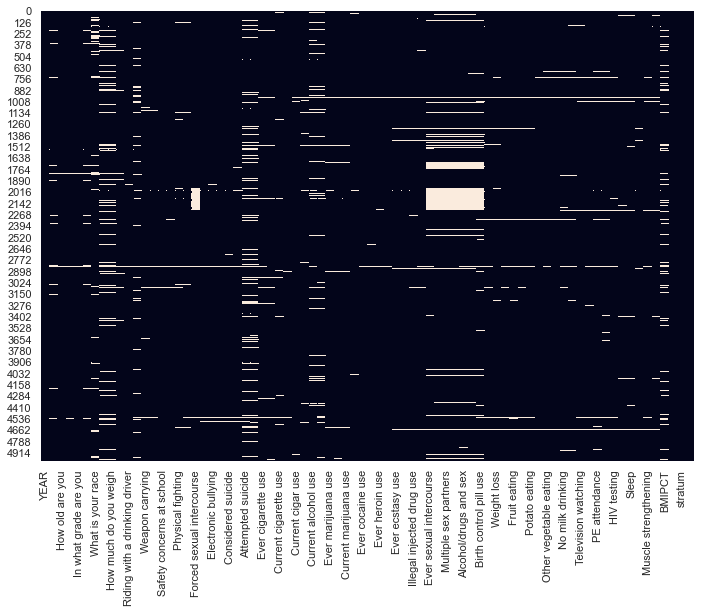

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(df.iloc[:5000,:].isnull(), cbar=False)

### Droping Values

In [13]:
df.dropna(subset=['Attempted suicide','Considered suicide','Alcohol/drugs and sex', 'Condom use'], inplace=True)

In [14]:
df.drop(columns = ['Are you Hispanic/Latino','What is your race','Indoor tanning'], axis = 1, inplace=True)

In [ ]:
df.drop(columns = ['Are you Hispanic/Latino','What is your race','Indoor tanning'], axis = 1, inplace=True)

In [26]:
df[['Fruit juice drinking', 'Fruit eating', 'Green salad eating',
       'Potato eating', 'Carrot eating', 'Other vegetable eating',
       'No soda drinking', 'No milk drinking', 'Breakfast eating']]

In [16]:
df[['Breakfast eating']].value_counts()

Breakfast eating
8.0                 17663
1.0                  6752
3.0                  5464
4.0                  5020
6.0                  4247
5.0                  3885
2.0                  3529
7.0                  2827
dtype: int64

In [17]:
# np.where(df['Fruit juice drinking'] <= 2), 0, 1)

In [18]:
# final_df.loc[final_df["month"].isin([12,1,2]),"season1"] = "winter"

In [19]:
#Create new column using healthy eating questions
# create a list of our conditions
conditions = [
    (df['Fruit juice drinking'] > 2) | (df['Fruit eating'] > 2) | (df['Green salad eating'] > 2) |
    (df['Potato eating'] > 2) | (df['Carrot eating'] > 2)| (df['Other vegetable eating'] > 2) |
    (df['No soda drinking'] <= 2) | (df['No milk drinking'] > 2)| (df['Breakfast eating'] > 4)
    ]

# create a list of the values we want to assign for each condition
values = [1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['healthy_eating'] = np.select(conditions, values)

# display updated DataFrame
# df.head()

In [20]:
#drop columns relating to healthy eating
df.drop(columns = ['Fruit juice drinking', 'Fruit eating', 'Green salad eating',
                   'Potato eating', 'Carrot eating', 'Other vegetable eating',
                   'No soda drinking', 'No milk drinking', 'Breakfast eating'], axis = 1, inplace=True)

In [21]:
#create new column using drug questions
df['Has used hard drugs'] = np.where((df['Ever cocaine use']>=1)|(df['Ever prescription pain medicine use']>=1)|(df['Ever inhalant use']>=1)|(df['Ever heroin use']>=1)|(df['Ever methamphetamine use']>=1)|(df['Ever ecstasy use']>=1),1,0)

In [22]:
#drop existing drug questions
df.drop(columns = ['Ever cocaine use', 'Ever prescription pain medicine use',
                   'Ever inhalant use', 'Ever heroin use', 'Ever methamphetamine use',
                   'Ever ecstasy use'], axis = 1, inplace=True)

In [27]:
df.shape

(53548, 62)

In [24]:
df.isnull().sum()

YEAR                                  0
raceeth                            1035
How old are you                     227
What is your sex                    241
In what grade are you               307
How tall are you                   3935
How much do you weigh              3935
Seat belt use                      1013
Riding with a drinking driver      1064
Drinking and driving               2709
Weapon carrying                    1767
Weapon carrying at school           948
Safety concerns at school           105
Threatened at school                143
Physical fighting                  1088
Physical fighting at school         783
Forced sexual intercourse           185
Bullying at school                  521
Electronic bullying                1105
Sad or hopeless                     141
Considered suicide                    0
Made a suicide plan                 274
Attempted suicide                     0
Injurious suicide attempt          2413
Ever cigarette use                 3089


### Transposing df to look at rows with certain # of null values

In [39]:
f = df.T.isna().sum().sort_values(ascending=False)

In [68]:
ind = f[f>60].index
len(ind)

1

In [70]:
df.loc[~df.index.isin(ind),:].isnull().sum()

YEAR                                       0
raceeth                                 1765
How old are you                          357
What is your sex                         468
In what grade are you                    520
Are you Hispanic/Latino                 1267
What is your race                       9777
How tall are you                        6565
How much do you weigh                   6565
Seat belt use                           7481
Riding with a drinking driver           1533
Drinking and driving                    5400
Weapon carrying                         8092
Weapon carrying at school               1917
Safety concerns at school               2864
Threatened at school                     934
Physical fighting                       8683
Physical fighting at school             1610
Forced sexual intercourse               3792
Bullying at school                      1362
Electronic bullying                     2150
Sad or hopeless                          906
Considered

In [66]:
df_dropped = df.loc[~df.index.isin(ind),:]
df_dropped.isnull().sum()

YEAR                                       0
raceeth                                 1554
How old are you                          320
What is your sex                         361
In what grade are you                    452
Are you Hispanic/Latino                 1095
What is your race                       9524
How tall are you                        6090
How much do you weigh                   6090
Seat belt use                           6828
Riding with a drinking driver           1242
Drinking and driving                    5023
Weapon carrying                         7375
Weapon carrying at school               1667
Safety concerns at school               2471
Threatened at school                     786
Physical fighting                       7992
Physical fighting at school             1382
Forced sexual intercourse               3369
Bullying at school                      1014
Electronic bullying                     1757
Sad or hopeless                          621
Considered

In [56]:
df.columns

Index(['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you', 'Are you Hispanic/Latino', 'What is your race',
       'How tall are you', 'How much do you weigh', 'Seat belt use',
       'Riding with a drinking driver', 'Drinking and driving',
       'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever pres

### MSNO Null Value

<AxesSubplot:>

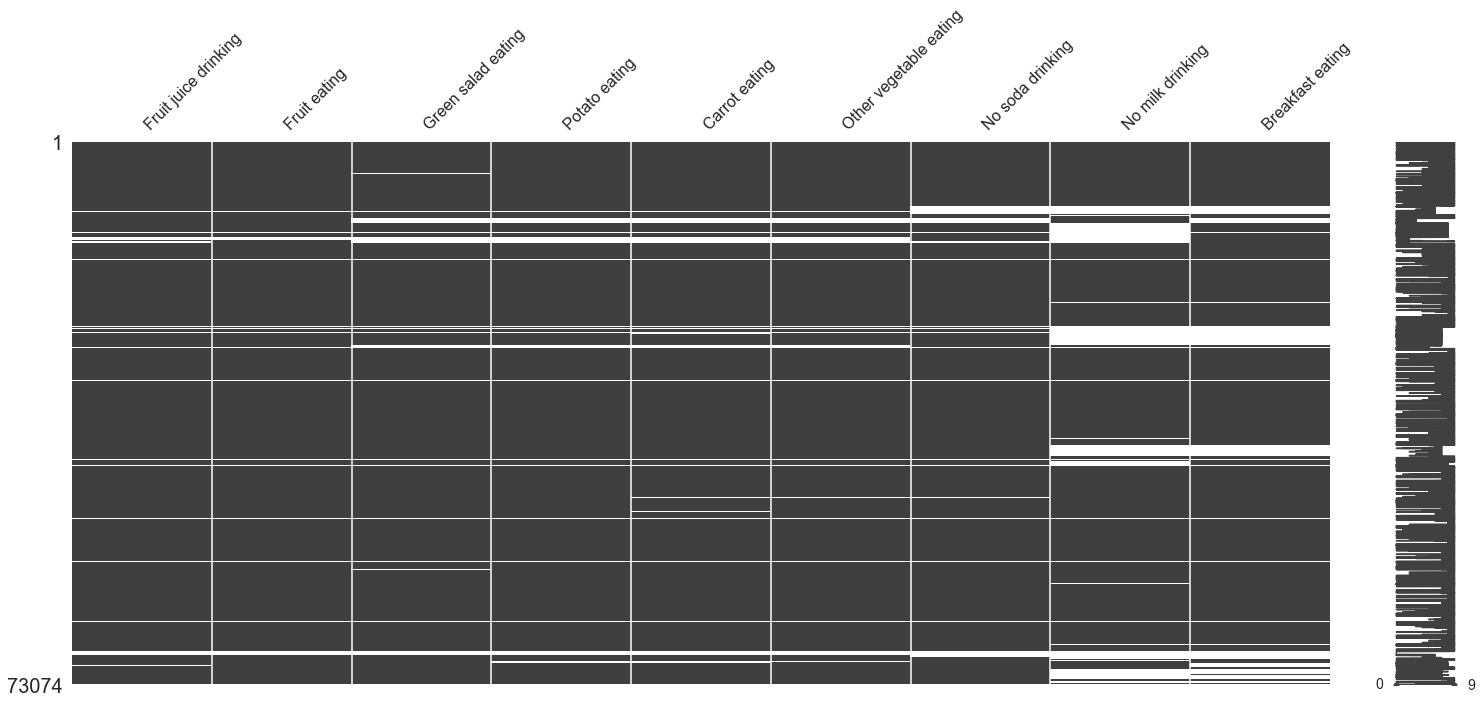

In [59]:
msno.matrix(df[['Fruit juice drinking', 'Fruit eating', 'Green salad eating',
       'Potato eating', 'Carrot eating', 'Other vegetable eating',
       'No soda drinking', 'No milk drinking', 'Breakfast eating']])

In [36]:
import missingno as msno
# msno.bar(df)

In [77]:
# msno.matrix(df)

In [76]:
# msno.heatmap(df)

## Modeling

In [24]:
df['Considered suicide'].value_counts()

2.0    59513
1.0    12695
Name: Considered suicide, dtype: int64

In [25]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets


from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [44]:
X = df.drop(columns=['Considered suicide', 'q6orig', 'q7orig', 'What is your race'], axis=1)
y = df['Considered suicide']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# model_log = logreg.fit(X_train, y_train)
# model_log

In [48]:
# model_log = logreg.fit(X_train, y_train)